origin: http://pytorch.org/tutorials/beginner/pytorch_with_examples.html  
translator: Hongpu Liu

In [1]:
%matplotlib inline
from __future__ import print_function

# Numpy实现神经网络
在开始介绍PyTorch之前，首先用numpy实现该神经网络。

Numpy提供了N维数组对象，以及对数组进行各种操作的函数。Numpy作为通用的科学计算框架，并不包含任意的计算图、深度学习和梯度。然而，可以使用numpy手动实现前馈和反馈来拟合一个两层的神经网络：

In [2]:
import numpy as np

# N     ：样本的数量，本例采用批量梯度下降，每次训练使用全部的样本
# D_in  ：输入特征的维度
# H     ：隐层神经元的数量
# D_out ：输出层维度
N, D_in, H, D_out = 64, 1000, 100, 10

# 随机生成数据集，包含N个输入和N个输出
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

# 对神经网络的权重进行随机初始化
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

# 设置学习率
learning_rate = 1e-6

losses = []
for t in range(500):
    # 前馈过程：计算预测的y
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    
    # 计算和打印loss
    loss = np.square(y_pred - y).sum()
    print(t, loss)
    losses.append(loss)
    
    # 反向传播：计算loss对w1和w2的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 26613813.1661
1 22237807.3704
2 20273906.1142
3 18262183.1344
4 15468042.8148
5 11950710.1402
6 8553144.53362
7 5763054.22565
8 3807666.99819
9 2530540.55111
10 1737828.82592
11 1245594.06494
12 935756.579246
13 732762.647356
14 593926.314944
15 494160.389647
16 419250.830689
17 360754.429213
18 313701.817902
19 274932.937258
20 242445.968707
21 214886.041622
22 191267.553786
23 170862.191071
24 153122.396721
25 137622.359768
26 124013.903078
27 112021.565313
28 101410.995833
29 92010.697452
30 83658.9271366
31 76206.6229809
32 69547.357001
33 63582.604318
34 58224.3457242
35 53398.6770771
36 49039.46966
37 45094.8390764
38 41522.2951001
39 38279.1223933
40 35332.209712
41 32650.0522688
42 30204.6565712
43 27972.7593675
44 25933.2746344
45 24065.0632184
46 22352.4899399
47 20779.90587
48 19335.0702796
49 18007.2517221
50 16785.297921
51 15659.2399043
52 14620.402032
53 13660.3761595
54 12772.225515
55 11950.3680243
56 11189.8909844
57 10484.4505376
58 9829.76807479
59 9221.97983517
6

472 0.000506988601037
473 0.000488836789491
474 0.000471333659184
475 0.000454461471843
476 0.000438195341335
477 0.000422513614593
478 0.000407393277978
479 0.000392817127635
480 0.000378763791073
481 0.000365217033518
482 0.000352153830485
483 0.000339560852415
484 0.000327420670059
485 0.000315715608444
486 0.00030443036238
487 0.000293549693326
488 0.000283059648676
489 0.000272944290918
490 0.000263194502619
491 0.000253790864341
492 0.000244726307601
493 0.000235984690049
494 0.000227559387477
495 0.000219434140992
496 0.000211601220696
497 0.00020404628621
498 0.000196764418681
499 0.00018974171756


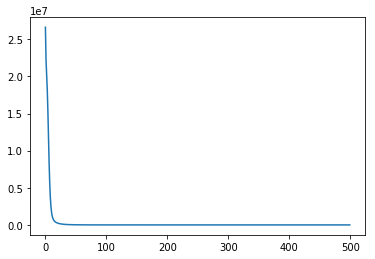

In [3]:
import matplotlib.pyplot as plt
plt.plot(losses)